In [93]:
import matplotlib as plt
import pandas as pd


In [94]:
mousedata_path = "Data\\Mouse_metadata.csv"
studydata_path = "Data\\Study_results.csv"

In [95]:
rawdatam = pd.read_csv(mousedata_path)
rawdatas = pd.read_csv(studydata_path)

In [96]:
rawdatam

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [97]:
rawdatas

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [98]:
rawdata = pd.merge(rawdatam,rawdatas, on="Mouse ID", how="right").rename(columns={"Timepoint": "Time (days)"})
display(rawdata)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [99]:
display(rawdata.describe()) # Verify ability to perform numeric operations on expected columns
display(rawdata.dtypes) # Verify data types are as expected
display(rawdata.count().to_frame()) #Check for blanks

,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Time (days)             int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

,0
Mouse ID,1893
Drug Regimen,1893
Sex,1893
Age_months,1893
Weight (g),1893
Time (days),1893
Tumor Volume (mm3),1893
Metastatic Sites,1893


In [100]:
 # Check for multiple values for each mouseID/timepoint combination
(rawdata.copy()
              .groupby(["Mouse ID","Time (days)"])
              .agg({"Time (days)":"count"}).rename(columns = {"Time (days)":"Duplicates"})
              .sort_values("Duplicates",ascending = False)
)

Duplicates
Mouse ID Time (days)            
g989     20                    2
         15                    2
         10                    2
         5                     2
         0                     2
...                          ...
i334     20                    1
         15                    1
         10                    1
         5                     1
z969     45                    1

[1888 rows x 1 columns]

In [101]:
#Remove any timepoints with multiple values from the data set
cleandata = rawdata.copy().drop_duplicates(subset=["Mouse ID","Time (days)"],keep=False)
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [102]:
# Calculate statistics on tumor volume for each drug used in the study
drugstats = cleandata.copy().groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
drugstats.style.format("{:.2f}")

In [103]:
#Determine the number of mice alive at each timepoint, split by drug used
drugmicecounts = (cleandata.copy().groupby(["Drug Regimen","Time (days)"])
                  .agg({"Mouse ID":'count'}).unstack().T.droplevel(0,0)
                 )
drugmicecounts

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Time (days),,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


In [104]:
drugmicecounts.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Time (days)')

In [105]:
drugmicecounts.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

<AxesSubplot:title={'center':'Survival Rates for Mice in a Skin Cancer Study'}, xlabel='Time (days)', ylabel='Mice Remaining'>

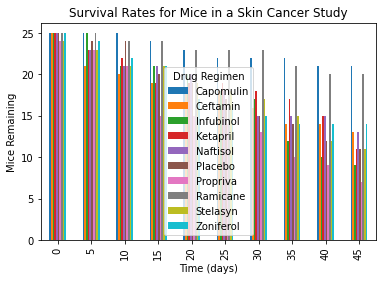

In [106]:
drugmicecounts.plot(ylabel = "Mice Remaining",kind="bar",title = "Survival Rates for Mice in a Skin Cancer Study")

In [107]:
gendermice= rawdatam["Sex"].copy().value_counts()
gendermice

Male      125
Female    124
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Gender Demographic Across All Drug Regimens'>

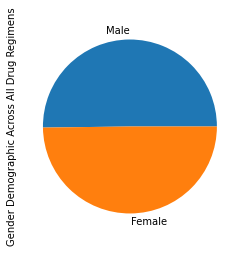

In [109]:
gendermice.plot(kind = "pie",ylabel="Gender Demographic Across All Drug Regimens")

In [110]:
# Evaluate drug effectiveness on reducing tumor size, min max is wrong, need to determine upper and lower bounds, and find which mice are outliers
mouselast = rawdata.copy().groupby(["Drug Regimen","Mouse ID"]).agg({"Time (days)":"last"})
display(mouselast)
def q1(x):
    return x.quantile(.25)
def q3(x):
    return x.quantile(.75)
    
finalvolume = (pd.merge(mouselast,rawdata, on = ["Mouse ID","Time (days)"], how = "left")
               .groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":[q1,q3]}).droplevel(0,1)
              )
finalvolume
finalvolume["IQR"] = finalvolume["q3"]-finalvolume["q1"]
display(finalvolume)

topdrugs = finalvolume.T[["Capomulin", "Ramicane","Infubinol","Ceftamin"]].T
topdrugs

Time (days)
Drug Regimen Mouse ID             
Capomulin    b128               45
             b742               45
             f966               20
             g288               45
             g316               45
...                            ...
Zoniferol    q633               45
             s337               45
             w140                5
             w575               45
             x613               15

[249 rows x 1 columns]

,q1,q3,IQR
Drug Regimen,,,
Capomulin,32.377357,40.159220,7.781863
Ceftamin,48.722078,64.299830,15.577752
Infubinol,54.048608,65.525743,11.477135
Ketapril,56.720095,69.872251,13.152155
Naftisol,52.079510,69.563621,17.484111
Placebo,52.942902,68.134288,15.191386
Propriva,49.122969,62.570880,13.447911
Ramicane,31.560470,40.659006,9.098537
Stelasyn,52.476596,69.103944,16.627349


,q1,q3,IQR
Drug Regimen,,,
Capomulin,32.377357,40.159220,7.781863
Ramicane,31.560470,40.659006,9.098537
Infubinol,54.048608,65.525743,11.477135
Ceftamin,48.722078,64.299830,15.577752


In [ ]:
#matplotlib box and whisker chart

Mouse ID                             b128       b742       f966       g288  \
                   Time (days)                                               
Tumor Volume (mm3) 0            45.000000  45.000000  45.000000  45.000000   
                   5            45.651331  41.534097  38.796474  45.839400   
                   10           43.270852  41.999228  35.624403  46.304003   
                   15           43.784893  39.524843  32.623003  42.172301   
                   20           42.731552  37.950355  30.485985  42.957120   
                   25           43.262145  38.617684        NaN  42.368692   
                   30           40.605335  39.167949        NaN  42.874461   
                   35           37.967644  39.847576        NaN  38.954115   
                   40           38.379726  38.255627        NaN  36.356851   
                   45           38.982878  38.939633        NaN  37.074024   

Mouse ID                             g316       i557       i738       j119  \
                   Time (days)                                               
Tumor Volume (mm3) 0            45.000000  45.000000  45.000000  45.000000   
                   5            44.022752  42.261665  45.595685  45.838998   
                   10           44.502042  42.992077  43.421014  46.425366   
                   15           45.216743  43.529876  37.978778  47.322984   
                   20           45.933322  43.967895  38.531136  48.158209   
                   25           46.809225  44.596219  34.973438  42.417166   
                   30           44.221480  45.261384  35.578780  43.013681   
                   35           44.702833  45.941949  36.175953  43.765705   
                   40           45.565821  46.821070  36.843898  44.585090   
                   45           40.159220  47.685963  37.311846  38.125164   

Mouse ID                             j246       l509  ...       r944  \
                   Time (days)                        ...              
Tumor Volume (mm3) 0            45.000000  45.000000  ...  45.000000   
                   5            45.641438  45.851193  ...  45.737145   
                   10           46.408361  46.759074  ...  46.544292   
                   15           43.312654  47.488599  ...  47.373423   
                   20           44.020370  48.070452  ...  43.225671   
                   25           44.555226  44.006257  ...  41.086991   
                   30           38.044082  44.708055  ...  41.680791   
                   35           38.753265  40.207288  ...  40.401765   
                   40                 NaN  40.770813  ...  41.042045   
                   45                 NaN  41.483008  ...  41.581521   

Mouse ID                             s185       s710       t565       u364  \
                   Time (days)                                               
Tumor Volume (mm3) 0            45.000000  45.000000  45.000000  45.000000   
                   5            43.878496  43.180977  45.895647  45.760886   
                   10           37.614948  43.688026  46.749006  46.568417   
                   15           38.177232  41.845235  44.440949  47.212200   
                   20           36.866876  42.629963  39.070214  40.343948   
                   25           33.949940  43.060409  37.342210  35.503616   
                   30           32.959671  43.571703  32.868916  35.978334   
                   35           28.328531  44.160519  33.515671  35.459490   
                   40           25.472143  40.171920  33.949341  36.024138   
                   45           23.343598  40.728578  34.455298  31.023923   

Mouse ID                             v923       w150       w914       x401  \
                   Time (days)                                               
Tumor Volume (mm3) 0            45.000000  45.000000  45.000000  45.000000   
                   5            45.704434  39.202129  45.893720  45.473753   
            

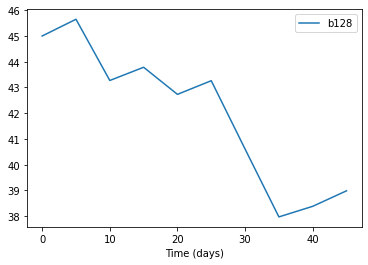

In [139]:
mousetimedata = rawdata.copy().groupby(["Drug Regimen","Mouse ID", "Time (days)"]).agg({"Tumor Volume (mm3)":"first"}).unstack()
capomulinmice = mousetimedata.T["Capomulin"]
singlemouse = capomulinmice.copy().iloc[:,0].to_frame().droplevel(0,0)
singlemouse.plot(kind ="line")

<AxesSubplot:title={'center':'Density Comparisons for Mice in the Capomulin Drug Regimen'}, xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

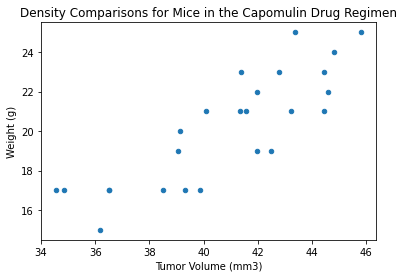

In [170]:
capomulintumors = (rawdata.copy().groupby(["Drug Regimen","Mouse ID"])
                   .agg({"Tumor Volume (mm3)":"mean","Weight (g)":'first'})
                   .T["Capomulin"].T)
capomulintumors.plot.scatter("Tumor Volume (mm3)","Weight (g)",title = "Density Comparisons for Mice in the Capomulin Drug Regimen")